References and inspiration
- [Creating a stacked barchart in R with ggplot2 (CC102)](https://www.youtube.com/watch?v=NVym44SdcaE)
- [Showing groups on a scatter plot for an ordination using ggplot2 (CC079)](https://www.youtube.com/watch?v=Y0GI34S-ZMI)
- [Cédric Scherer—Outlier 2021—ggplot wizardy: my favorite tricks and secrets for beautiful plots in R](https://www.youtube.com/watch?v=7UjA_5gNvdw&list=PL-snVkXNPdldX6R-njgKP4b_PFmgaLyjg)

In [1]:
library(tidyverse)
library(repr)
library(ggtext)
library(ggforce)
library(patchwork)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'readr' was built under R version 4.0.5"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'ggtext' was built under R version 4.0.5"
Warning message:
"package 'ggforce' was built under R version 4.0.5"
Warning message:
"package 'patchwork' was built under R version 4.0.5"


In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
# capitalizing species names
iris_changed <- iris %>%
    mutate(Species = str_to_title(Species))

head(iris_changed)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa
6,5.4,3.9,1.7,0.4,Setosa


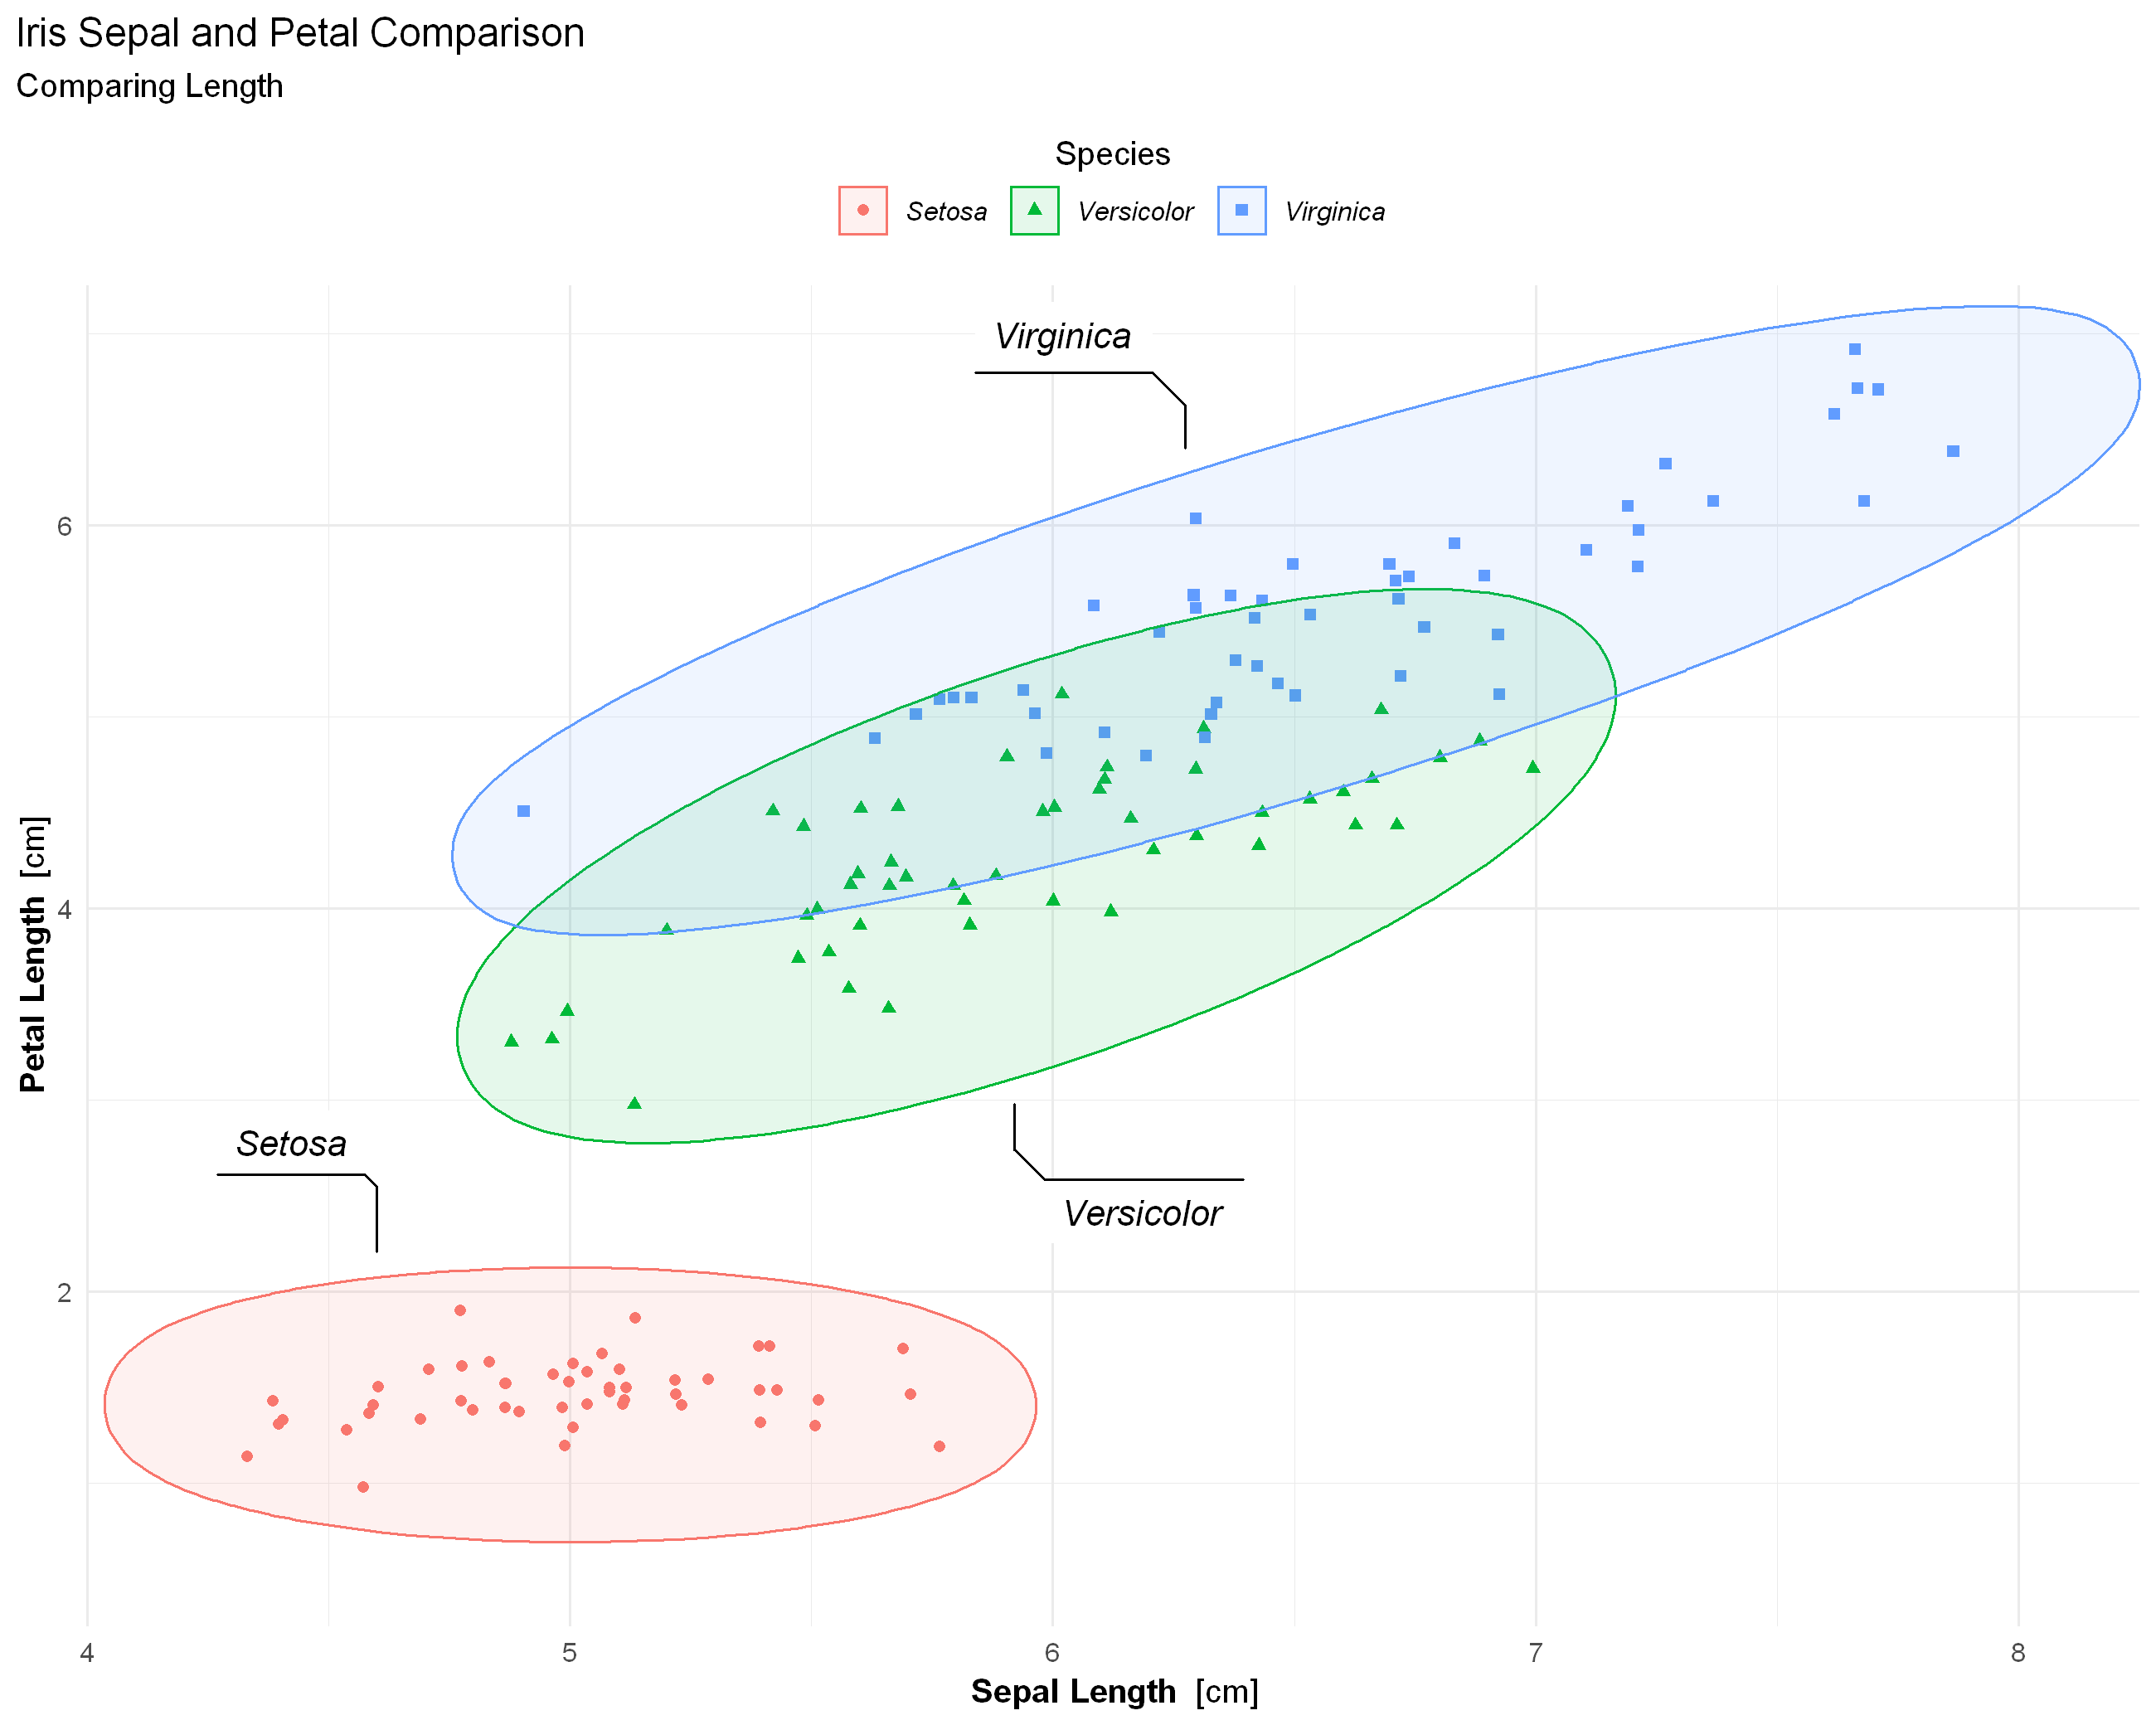

In [4]:
# creating visualization
options(repr.plot.res=260)
options(repr.plot.width = 10, repr.plot.height = 8)

p1 <- ggplot(iris_changed, aes(x = Sepal.Length, y = Petal.Length, color = Species, fill = Species)) + 
    geom_jitter(aes(shape = Species)) + 
    geom_mark_ellipse(aes(label = Species), alpha = 0.1, label.fontface = c("italic", "plain")) +
    labs(title = 'Iris Sepal and Petal Comparison', 
         x = '**Sepal Length** [cm]', 
         y = '**Petal Length** [cm]',
         subtitle = 'Comparing Length') + 
    theme_minimal() + 
    theme(axis.title.x = element_markdown(), 
          axis.title.y = element_markdown(), 
          plot.title.position = 'plot', 
          legend.position = 'top',
          legend.text = element_text(face = 'italic')) + 
    guides(shape = guide_legend(title.position = 'top', title.hjust = 0.5)) + 
    coord_cartesian(xlim = c(4, 8.25), ylim = c(0.25, 7.25), clip = 'off', expand = FALSE)

p1

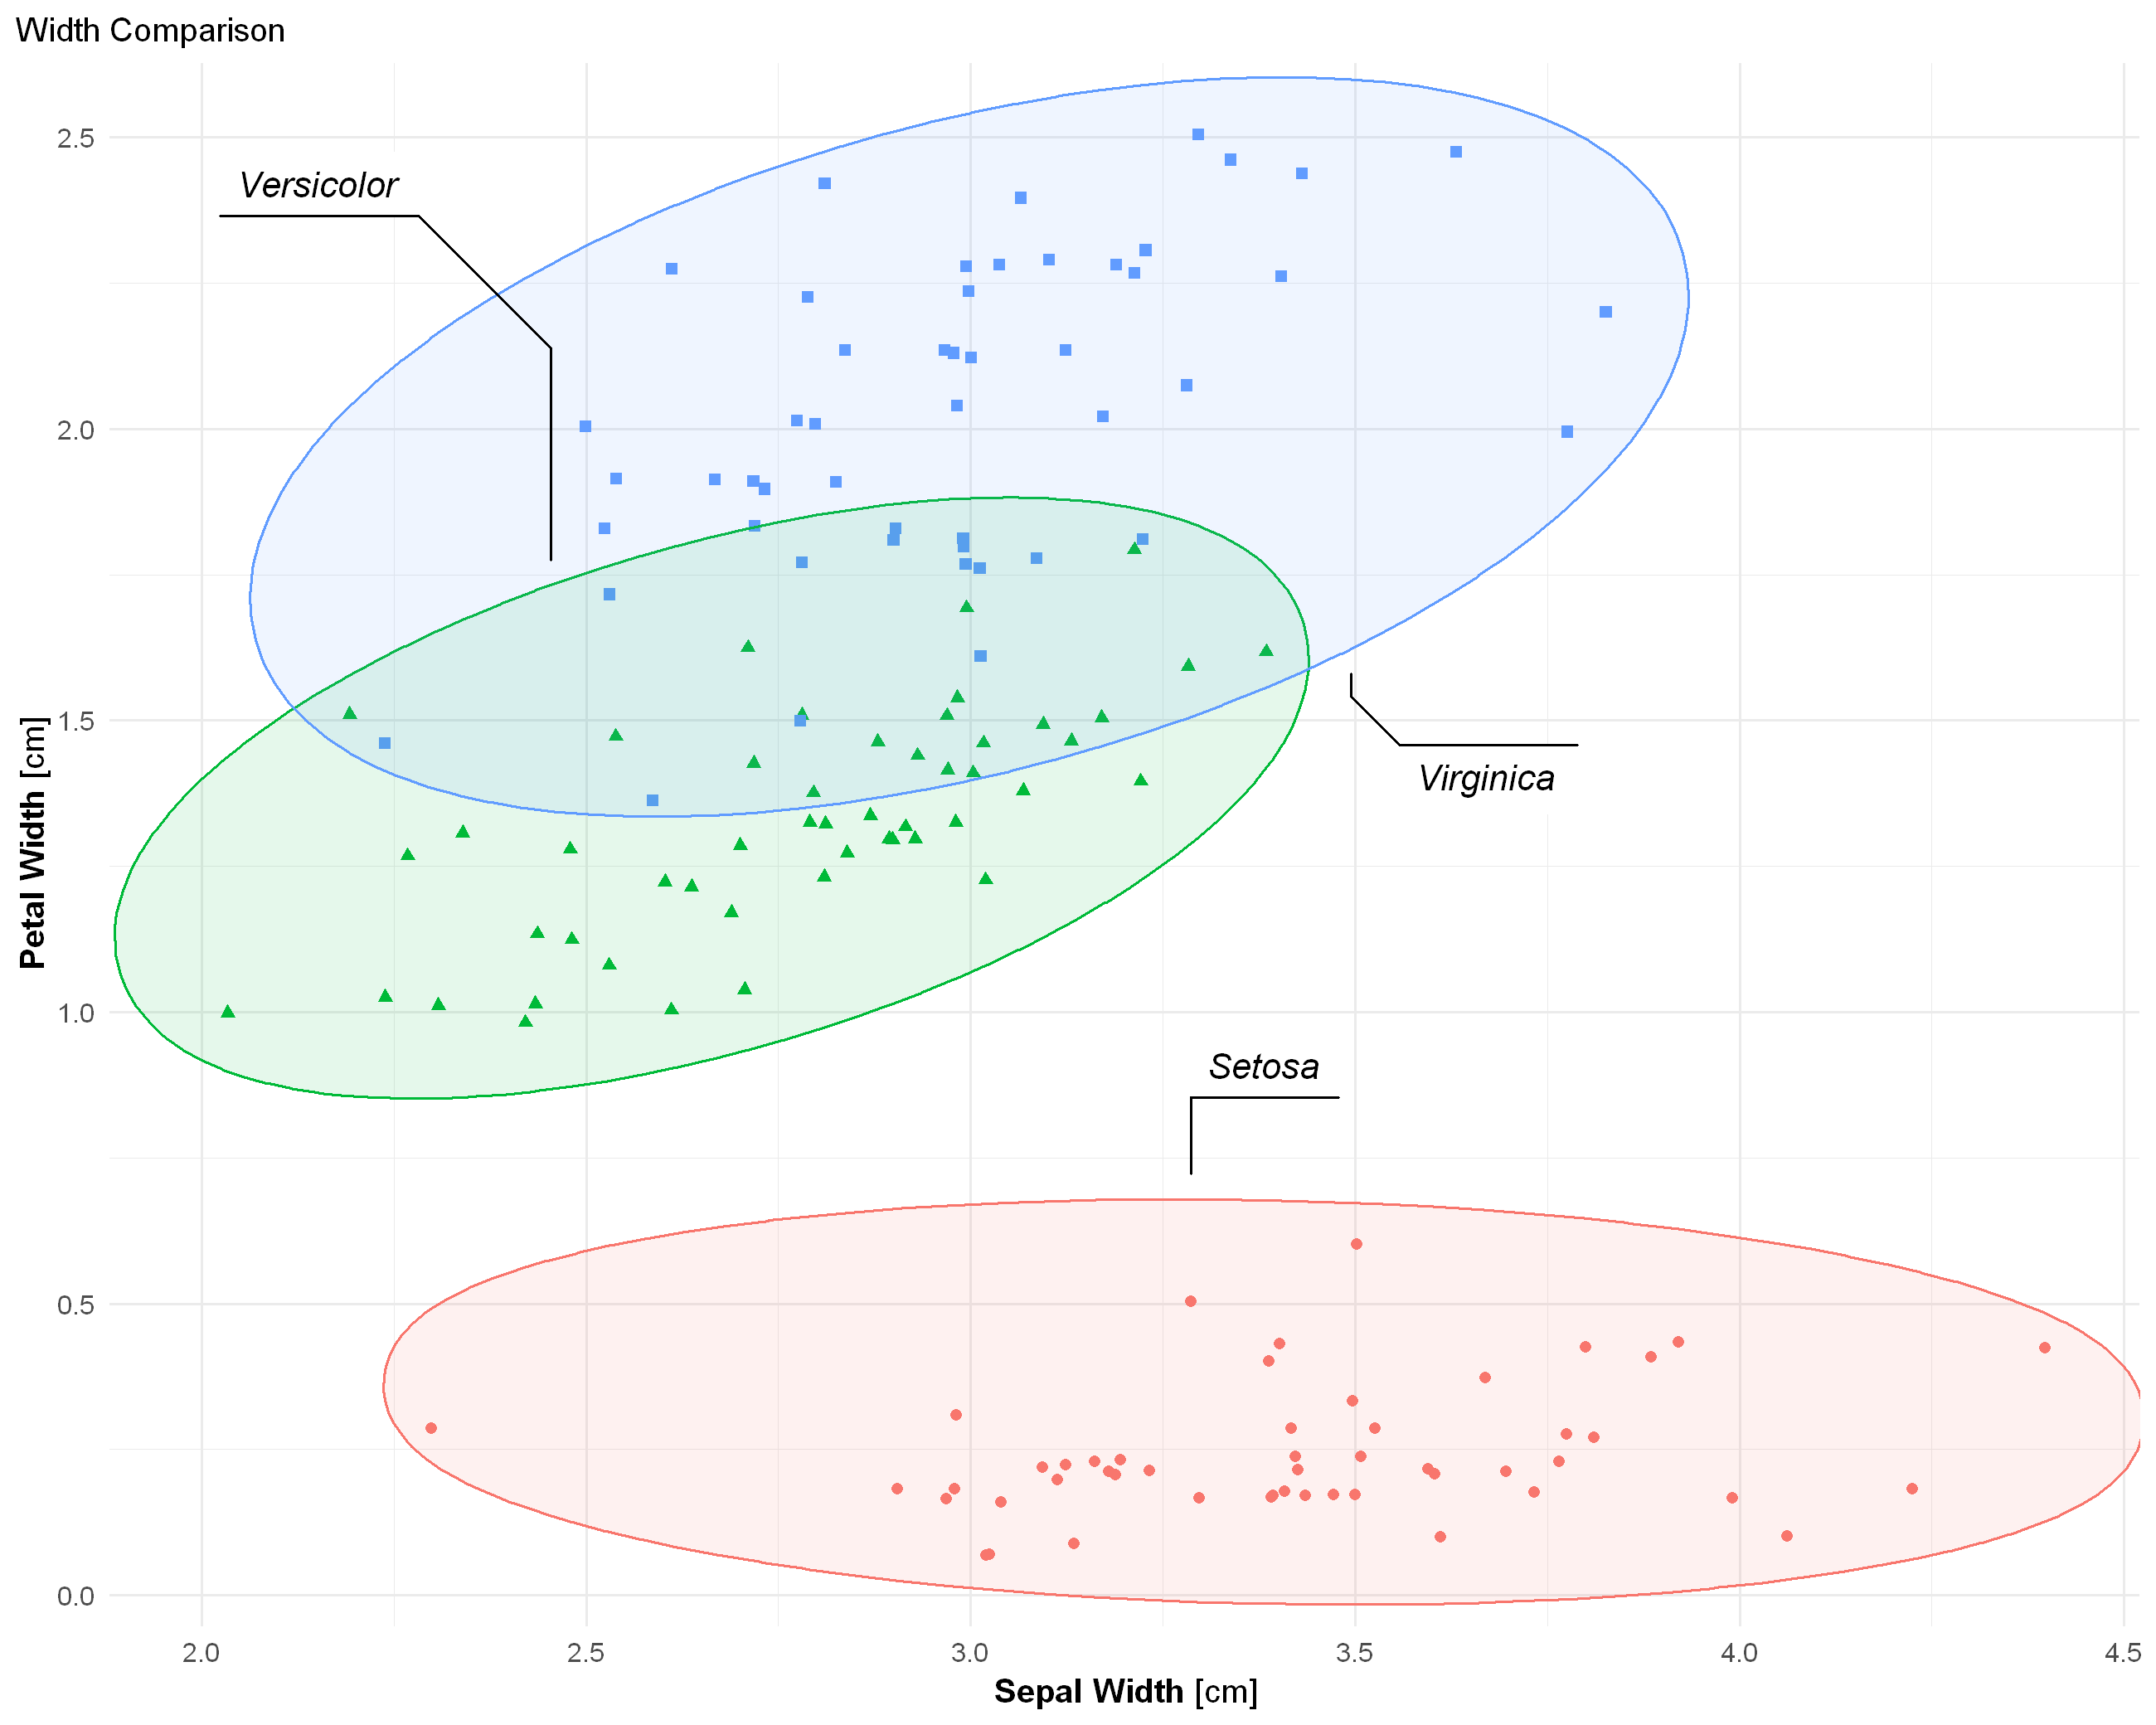

In [5]:
# creating visualization
options(repr.plot.res=260)
options(repr.plot.width = 10, repr.plot.height = 8)

p2 <- ggplot(iris_changed, aes(x = Sepal.Width, y = Petal.Width, color = Species, fill = Species), show.legend = FALSE) + 
    geom_jitter(aes(shape = Species), show.legend = FALSE) + 
    geom_mark_ellipse(aes(label = Species), alpha = 0.1, label.fontface = c("italic", "plain"), show.legend = FALSE) +
    labs(subtitle = 'Width Comparison', x = '**Sepal Width** [cm]', y = '**Petal Width** [cm]') + 
    theme_minimal() + 
    theme(axis.title.x = element_markdown(), 
          axis.title.y = element_markdown(), 
          plot.title.position = 'plot')

p2

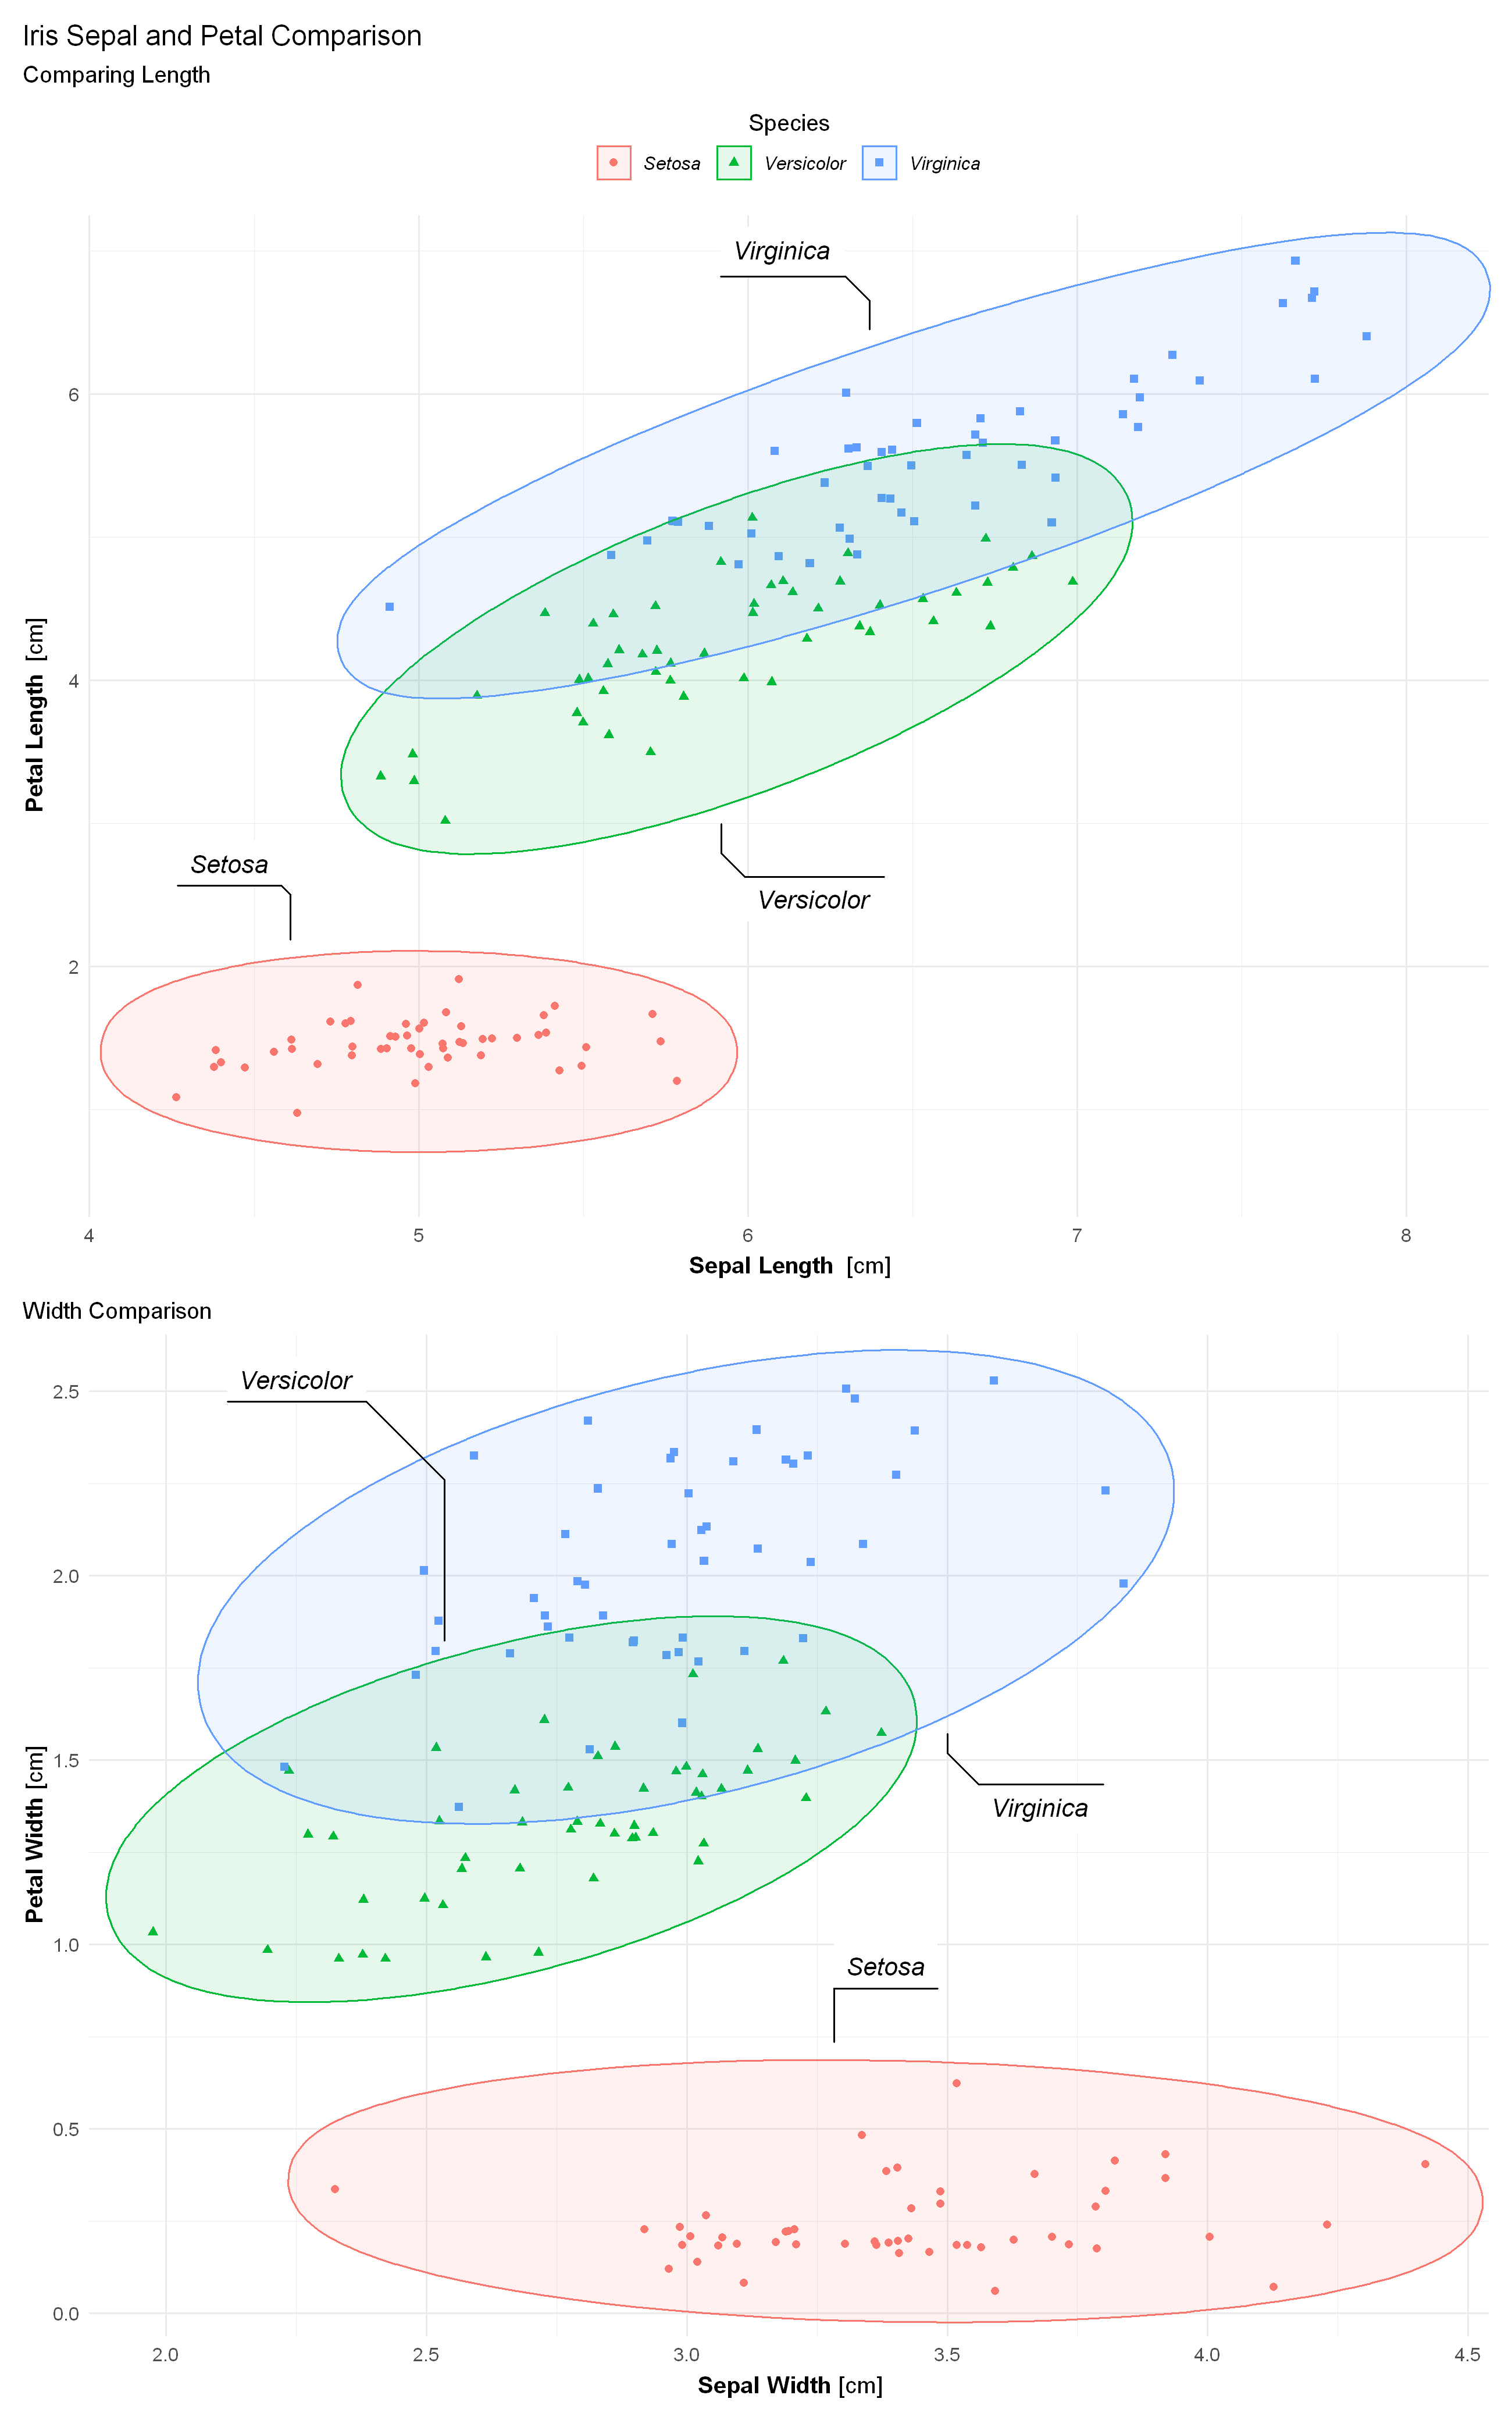

In [6]:
options(repr.plot.width = 10, repr.plot.height = 16)
(p1 / p2) + plot_layout(heights = c(1, 1))